In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.metrics import precision_score, recall_score, auc
from sklearn.metrics import roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [2]:
#Task 2
#Load Maternal Health Risk Data Set data into 'riskdata' dataframe
riskdata = pd.read_csv('Maternal Health Risk Data Set.csv') 
print("data summary")
print(riskdata.describe())
print(riskdata.info())

data summary
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Nul

In [3]:
# Data cleanliness evaluation
missing_values = riskdata.isnull().sum()
data_cleanliness_evaluation = pd.DataFrame({"Feature": missing_values.index, "Missing Values": missing_values.values})

print("Data Missing Value Detection:")
print(data_cleanliness_evaluation)
print()
# Identify missing and duplicate data
duplicate_data = riskdata.duplicated().sum()
print("Duplicate Data Count:", duplicate_data)



Data Missing Value Detection:
       Feature  Missing Values
0          Age               0
1   SystolicBP               0
2  DiastolicBP               0
3           BS               0
4     BodyTemp               0
5    HeartRate               0
6    RiskLevel               0

Duplicate Data Count: 562


In [4]:
# Outlier detection and removal
numerical_features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Define a function to detect outliers using IQR (Interquartile Range) method
def detect_outliers(df, features):
    outlier_indices = []
    
    for feature in features:
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > 1)
    
    return multiple_outliers

# Remove outliers from the dataset
outliers_to_drop= detect_outliers(riskdata, riskdata[numerical_features])

# Print the total number of outliers
# Calculate the total number of outliers
total_outliers = len(outliers_to_drop)
print("Total number of outliers:", total_outliers)

# Print the cleaned dataset
clean_riskdata = riskdata.drop(outliers_to_drop, axis=0).reset_index(drop=True)
print("\nCleaned Dataset after Data Cleaning with removing outliers:")
print(clean_riskdata.describe())
print(clean_riskdata)



Total number of outliers: 39

Cleaned Dataset after Data Cleaning with removing outliers:
              Age  SystolicBP  DiastolicBP          BS    BodyTemp   HeartRate
count  975.000000  975.000000   975.000000  975.000000  975.000000  975.000000
mean    29.782564  112.931282    76.303590    8.521282   98.599795   74.211282
std     13.500472   17.766059    13.708169    3.114128    1.321734    8.125838
min     10.000000   70.000000    49.000000    6.000000   98.000000    7.000000
25%     19.000000  100.000000    65.000000    6.900000   98.000000   70.000000
50%     25.000000  120.000000    80.000000    7.500000   98.000000   76.000000
75%     37.000000  120.000000    90.000000    7.900000   98.000000   80.000000
max     66.000000  140.000000   100.000000   19.000000  103.000000   90.000000
     Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0     25         130           80  15.0      98.0         86  high risk
1     35         140           90  13.0      98.0      

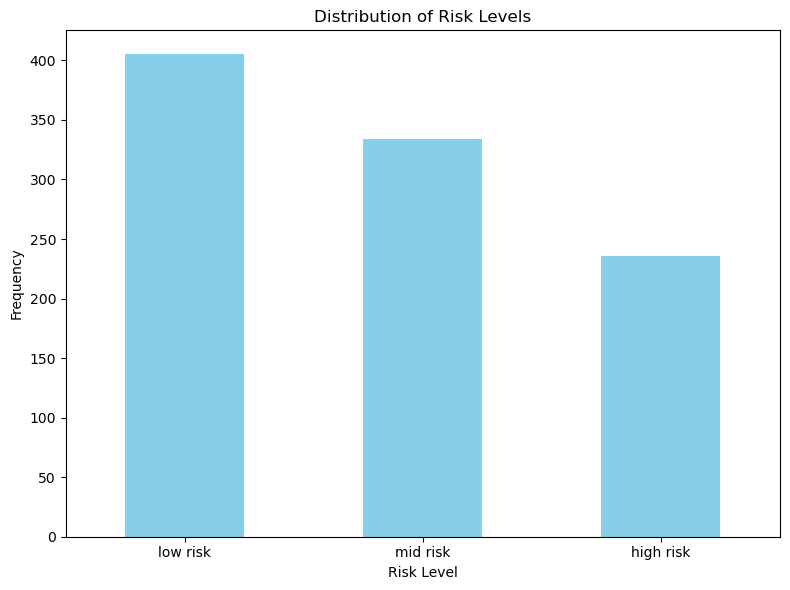

In [5]:
# Show the class distribution
# Count the occurrences of each unique value in the 'RiskLevel' column
risk_level_distribution = clean_riskdata['RiskLevel'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
risk_level_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()

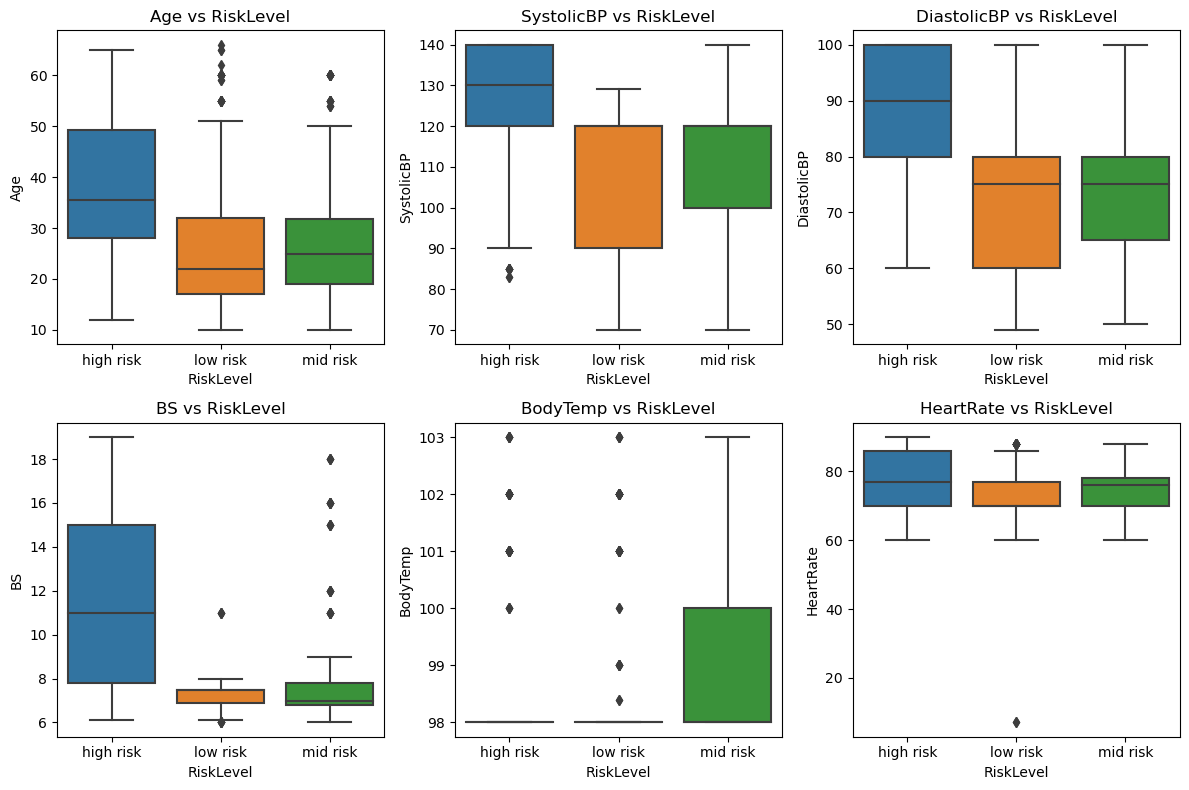

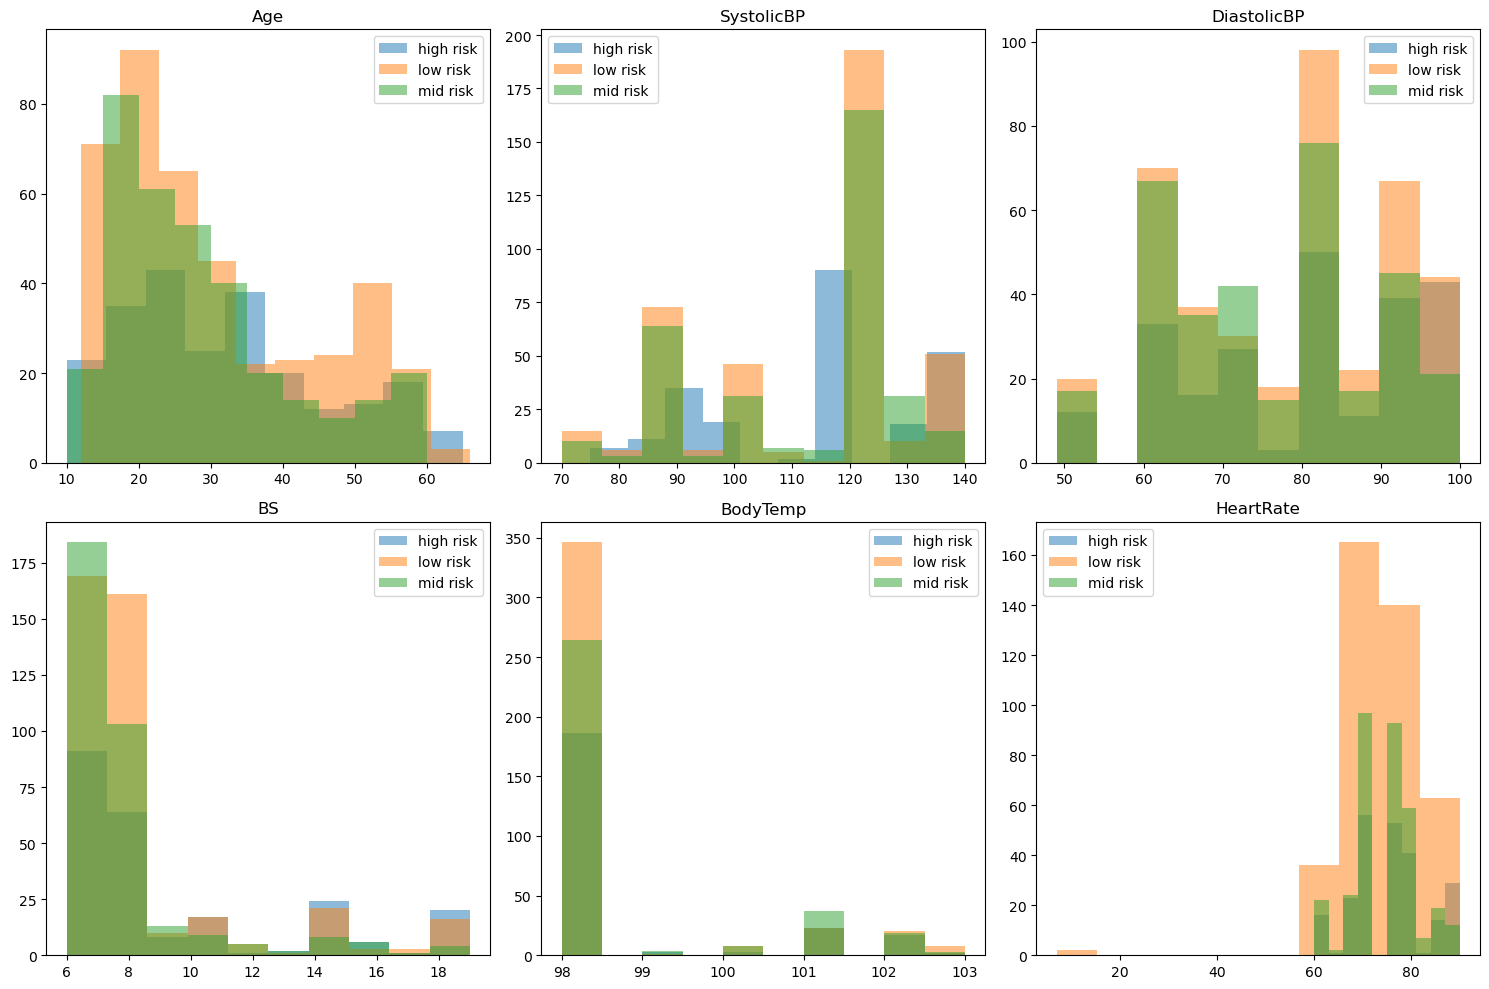

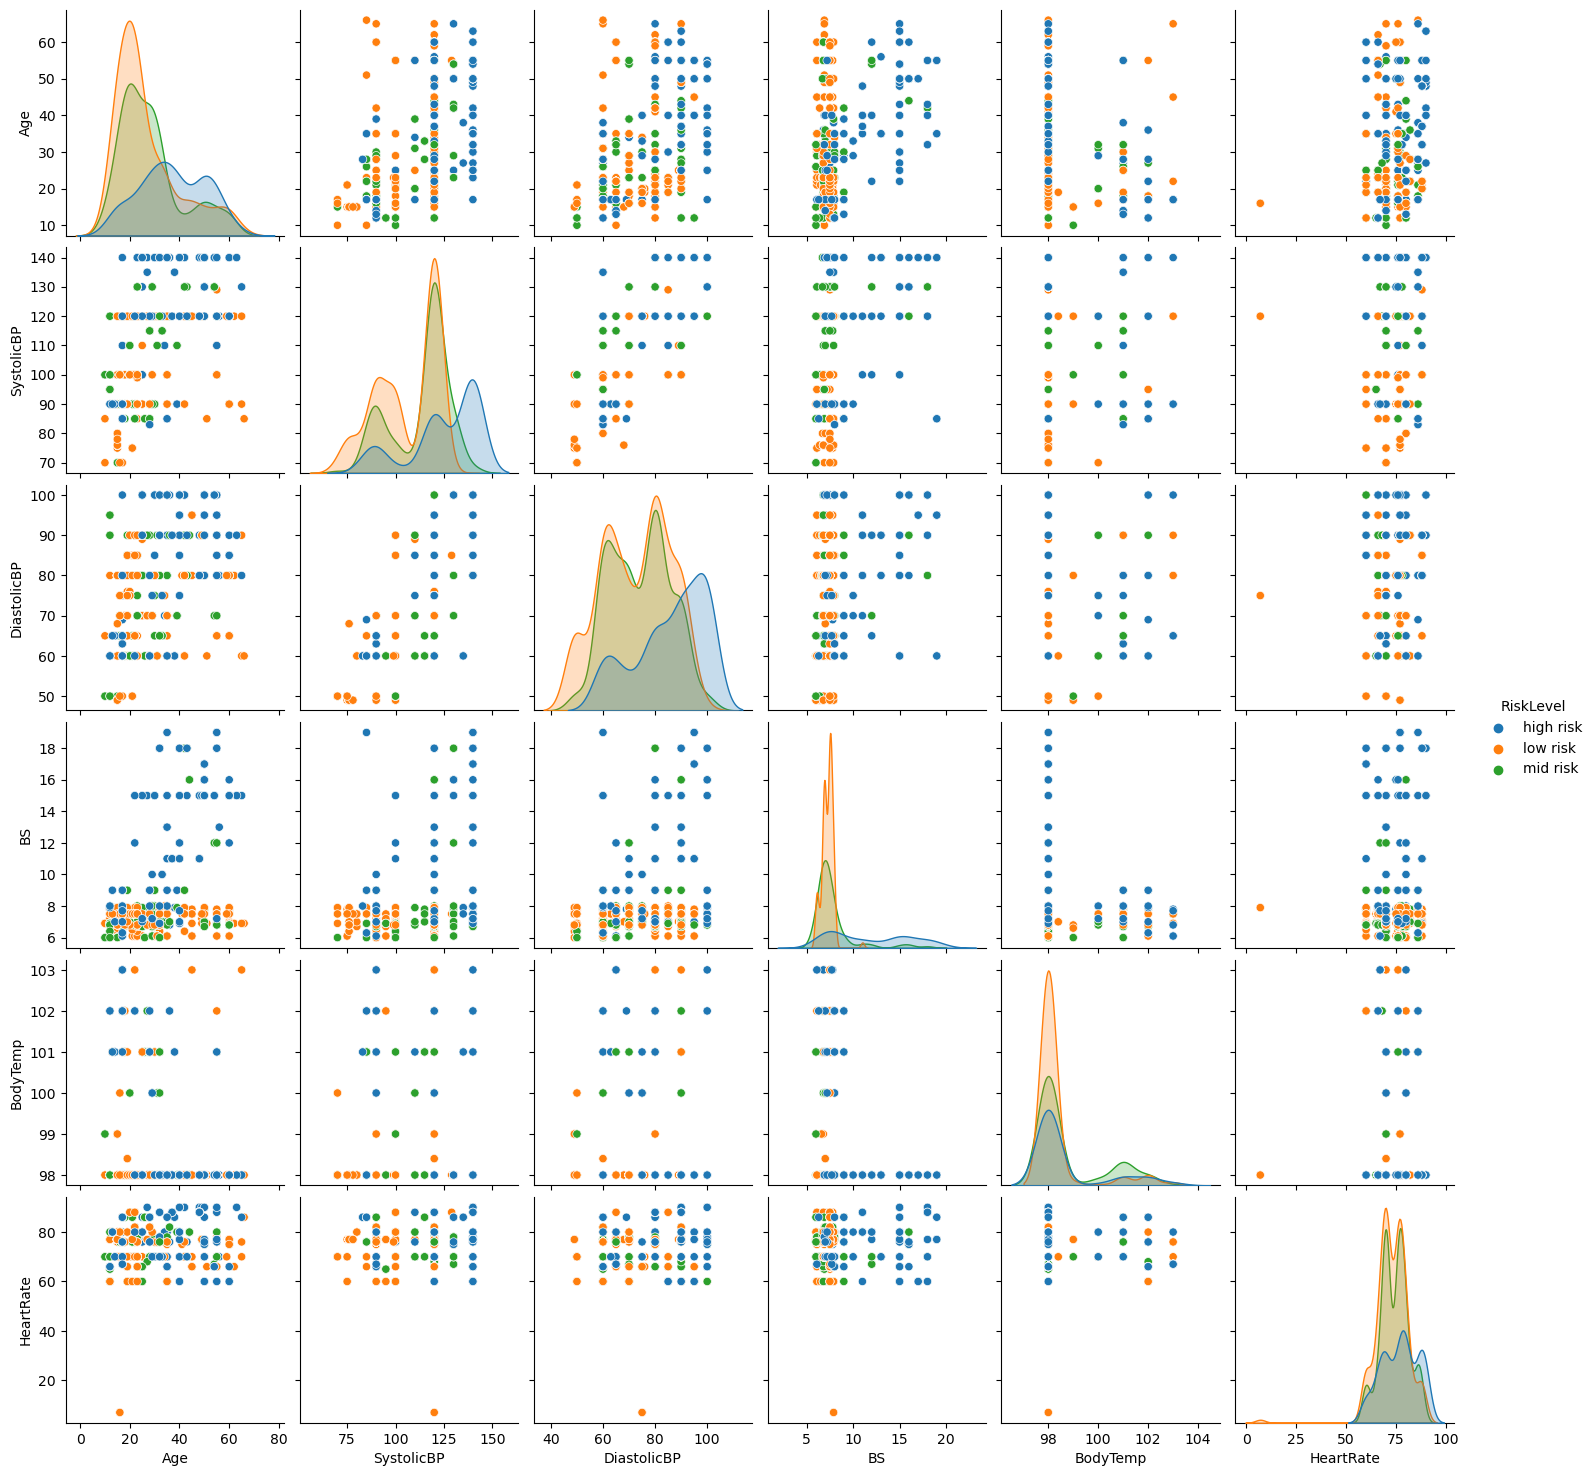

In [6]:
# Visualize the features using boxplots, histograms, and scatter plots
plt.figure(figsize=(12, 8))

# Boxplots

plt.subplot(2, 3, 1)
sns.boxplot(x="RiskLevel", y="Age", data=clean_riskdata)
plt.title("Age vs RiskLevel")

plt.subplot(2, 3, 2)
sns.boxplot(x="RiskLevel", y="SystolicBP", data=clean_riskdata)
plt.title("SystolicBP vs RiskLevel")

plt.subplot(2, 3, 3)
sns.boxplot(x="RiskLevel", y="DiastolicBP", data=clean_riskdata)
plt.title("DiastolicBP vs RiskLevel")

plt.subplot(2, 3, 4)
sns.boxplot(x="RiskLevel", y="BS", data=clean_riskdata)
plt.title("BS vs RiskLevel")

plt.subplot(2, 3, 5)
sns.boxplot(x="RiskLevel", y="BodyTemp", data=clean_riskdata)
plt.title("BodyTemp vs RiskLevel")

plt.subplot(2, 3, 6)
sns.boxplot(x="RiskLevel", y="HeartRate", data=clean_riskdata)
plt.title("HeartRate vs RiskLevel")

plt.tight_layout()
plt.show()

# Define the numerical attributes
numerical_attributes = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Create subplots for each numerical attribute
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axs array to easily access each subplot
axs = axs.flatten()

# Loop through each numerical attribute and create histograms
for i, attr in enumerate(numerical_attributes):
    # Filter the data for each RiskLevel
    for risk_level in clean_riskdata['RiskLevel'].unique():
        data_by_risk_level = clean_riskdata[riskdata['RiskLevel'] == risk_level]
        axs[i].hist(data_by_risk_level[attr], alpha=0.5, label=risk_level)
    
    axs[i].set_title(attr)
    axs[i].legend()

plt.tight_layout()
plt.show()

# Scatter plots
sns.pairplot(clean_riskdata, hue="RiskLevel")

#Taskplt.show()

Missing Values:
 Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64
Duplicate Data:
      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
66    19         120           80   7.0      98.0         70   mid risk
71    19         120           80   7.0      98.0         70   mid risk
96    19         120           80   7.0      98.0         70   mid risk
104   50         140           90  15.0      98.0         90  high risk
105   25         140          100   6.8      98.0         80  high risk
..   ...         ...          ...   ...       ...        ...        ...
970   22         120           60  15.0      98.0         80  high risk
971   55         120           90  18.0      98.0         60  high risk
972   35          85           60  19.0      98.0         86  high risk
973   43         120           90  18.0      98.0         70  high risk
974   32         120           65   6.0   

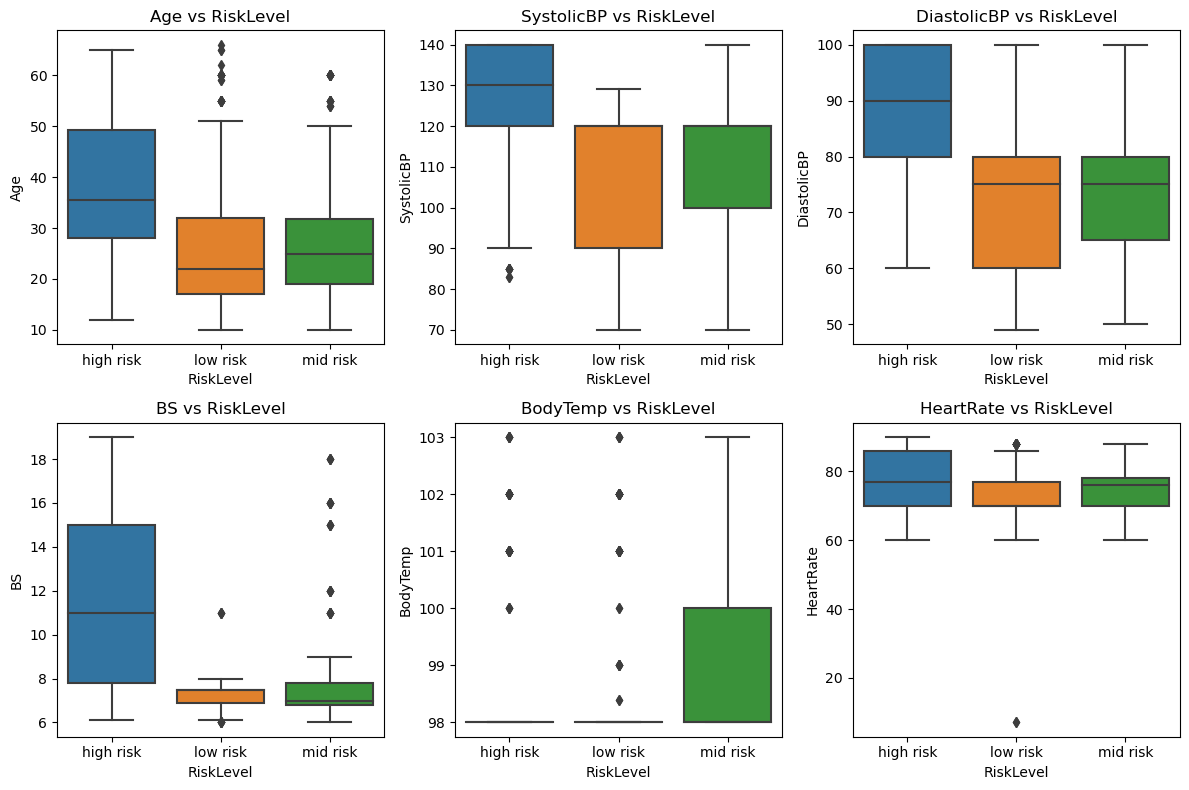

Clean Data after removing outliers using z-score:
      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0     25         130           80  15.0      98.0         86  high risk
1     35         140           90  13.0      98.0         70  high risk
2     29          90           70   8.0     100.0         80  high risk
3     30         140           85   7.0      98.0         70  high risk
4     35         120           60   6.1      98.0         76   low risk
..   ...         ...          ...   ...       ...        ...        ...
967   17          85           60   6.3     102.0         86  high risk
968   40         120           75   7.7      98.0         70  high risk
969   48         120           80  11.0      98.0         88  high risk
970   22         120           60  15.0      98.0         80  high risk
974   32         120           65   6.0     101.0         76   mid risk

[920 rows x 7 columns]


In [7]:
#Task 3 a)

# Step 1: Identifying Missing Data
missing_values = clean_riskdata.isnull().sum()
print("Missing Values:\n", missing_values)

# Step 2: Dealing with Missing Data
# There is no missing value. it does not need to handle missing values.

# Step 3: Identifying Duplicate Data
duplicate_data = clean_riskdata[clean_riskdata.duplicated()]
print("Duplicate Data:\n", duplicate_data)

# Step 4: Dealing with Duplicate Data
# Keep duplicate rows
# No action needed if duplicate rows are kept

# Step 5: Identifying Outliers 
plt.figure(figsize=(12, 8))

# Boxplots

plt.subplot(2, 3, 1)
sns.boxplot(x="RiskLevel", y="Age", data=clean_riskdata)
plt.title("Age vs RiskLevel")

plt.subplot(2, 3, 2)
sns.boxplot(x="RiskLevel", y="SystolicBP", data=clean_riskdata)
plt.title("SystolicBP vs RiskLevel")

plt.subplot(2, 3, 3)
sns.boxplot(x="RiskLevel", y="DiastolicBP", data=clean_riskdata)
plt.title("DiastolicBP vs RiskLevel")

plt.subplot(2, 3, 4)
sns.boxplot(x="RiskLevel", y="BS", data=clean_riskdata)
plt.title("BS vs RiskLevel")

plt.subplot(2, 3, 5)
sns.boxplot(x="RiskLevel", y="BodyTemp", data=clean_riskdata)
plt.title("BodyTemp vs RiskLevel")

plt.subplot(2, 3, 6)
sns.boxplot(x="RiskLevel", y="HeartRate", data=clean_riskdata)
plt.title("HeartRate vs RiskLevel")

plt.tight_layout()
plt.show()

from scipy import stats
numeric_columns = clean_riskdata.select_dtypes(include=['number']).columns

# Calculate z-scores for numeric columns only
z_scores = stats.zscore(clean_riskdata[numeric_columns])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

# Step 6: Dealing with Outliers
# Apply outlier detection and removal techniques
# Remove outliers using z-score

clean_riskdata = clean_riskdata[filtered_entries]
print("Clean Data after removing outliers using z-score:\n", clean_riskdata)


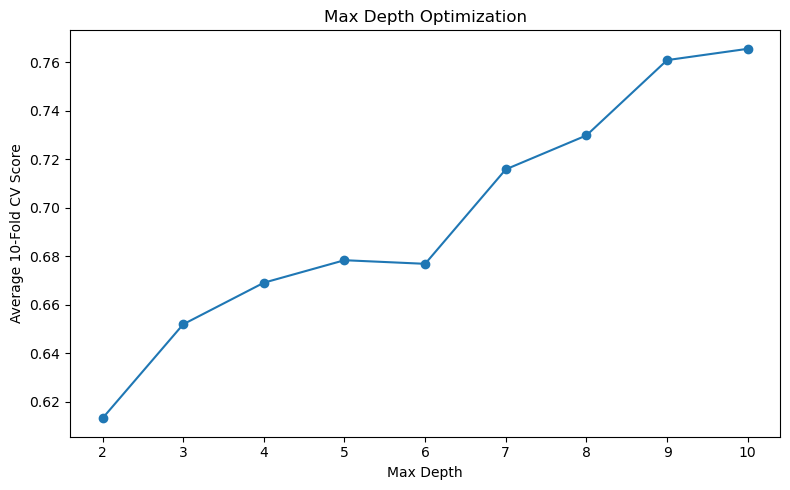

Maximum Depth Optimization:
Max Depth: 2 Average CV Score: 0.6132932692307692
Max Depth: 3 Average CV Score: 0.6520192307692307
Max Depth: 4 Average CV Score: 0.6691586538461538
Max Depth: 5 Average CV Score: 0.6784375
Max Depth: 6 Average CV Score: 0.6769471153846154
Max Depth: 7 Average CV Score: 0.7158894230769232
Max Depth: 8 Average CV Score: 0.7298798076923078
Max Depth: 9 Average CV Score: 0.7609134615384615
Max Depth: 10 Average CV Score: 0.765576923076923


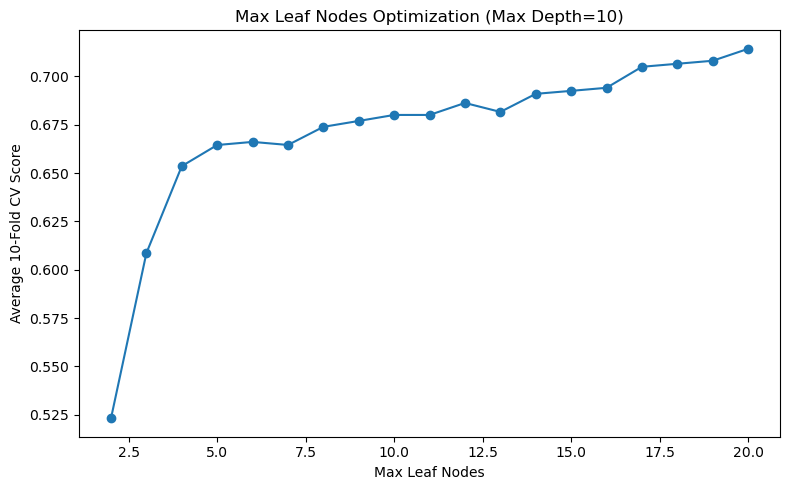


Maximum Leaf Nodes Optimization:
Max Leaf Nodes: 2 Average CV Score: 0.5231971153846154
Max Leaf Nodes: 3 Average CV Score: 0.6086298076923077
Max Leaf Nodes: 4 Average CV Score: 0.6536057692307693
Max Leaf Nodes: 5 Average CV Score: 0.6645192307692308
Max Leaf Nodes: 6 Average CV Score: 0.6661298076923077
Max Leaf Nodes: 7 Average CV Score: 0.6645432692307692
Max Leaf Nodes: 8 Average CV Score: 0.6739182692307693
Max Leaf Nodes: 9 Average CV Score: 0.6769711538461538
Max Leaf Nodes: 10 Average CV Score: 0.6800721153846154
Max Leaf Nodes: 11 Average CV Score: 0.6800721153846154
Max Leaf Nodes: 12 Average CV Score: 0.6862740384615384
Max Leaf Nodes: 13 Average CV Score: 0.6816346153846153
Max Leaf Nodes: 14 Average CV Score: 0.6909855769230769
Max Leaf Nodes: 15 Average CV Score: 0.6925240384615384
Max Leaf Nodes: 16 Average CV Score: 0.6941105769230769
Max Leaf Nodes: 17 Average CV Score: 0.7049759615384615
Max Leaf Nodes: 18 Average CV Score: 0.7065384615384616
Max Leaf Nodes: 19 Ave

In [8]:
#Task 3 b)
# Initialize lists to store results
max_depth_scores = []
max_leaf_nodes_scores = []

# Split the preprocessed data into features and target
X = clean_riskdata.drop('RiskLevel', axis=1)  # Features
y = clean_riskdata['RiskLevel']  # Target variable

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Maximum Depth Optimization
for max_depth in range(2, 11):  # Adjust the range as needed
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    scores = cross_val_score(dt, X_train, y_train, cv=10)
    max_depth_scores.append(np.mean(scores))

# Plotting the results
plt.figure(figsize=(8, 5))

plt.plot(range(2, 11), max_depth_scores, marker='o')
plt.title('Max Depth Optimization')
plt.xlabel('Max Depth')
plt.ylabel('Average 10-Fold CV Score')
plt.tight_layout()
plt.show()
print("Maximum Depth Optimization:")
for max_depth in range(2, 11):  # Adjust the range as needed
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    scores = cross_val_score(dt, X_train, y_train, cv=10)
    print("Max Depth:", max_depth, "Average CV Score:", np.mean(scores))
    max_depth_scores.append(np.mean(scores))

# Maximum Leaf Nodes Optimization
optimal_max_depth = 10
for max_leaf_nodes in range(2, 21):  # Adjust the range as needed
    dt = DecisionTreeClassifier(max_depth=optimal_max_depth, max_leaf_nodes=max_leaf_nodes, random_state=42)
    scores = cross_val_score(dt, X_train, y_train, cv=10)
    max_leaf_nodes_scores.append(np.mean(scores))


plt.figure(figsize=(8, 5))
plt.plot(range(2, 21, 1), max_leaf_nodes_scores, marker='o')
plt.title('Max Leaf Nodes Optimization (Max Depth={})'.format(optimal_max_depth))
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Average 10-Fold CV Score')

plt.tight_layout()
plt.show()


# Maximum Leaf Nodes Optimization
print("\nMaximum Leaf Nodes Optimization:")
optimal_max_depth = np.argmax(max_depth_scores) + 2  # Add 2 because we started from depth 2
for max_leaf_nodes in range(2, 21, 1):  # Adjust the range as needed
    dt = DecisionTreeClassifier(max_depth=optimal_max_depth, max_leaf_nodes=max_leaf_nodes, random_state=42)
    scores = cross_val_score(dt, X_train, y_train, cv=10)
    print("Max Leaf Nodes:", max_leaf_nodes, "Average CV Score:", np.mean(scores))
    max_leaf_nodes_scores.append(np.mean(scores))

Model accuracy score with criterion gini index: 0.66
Number of tree nodes:  39


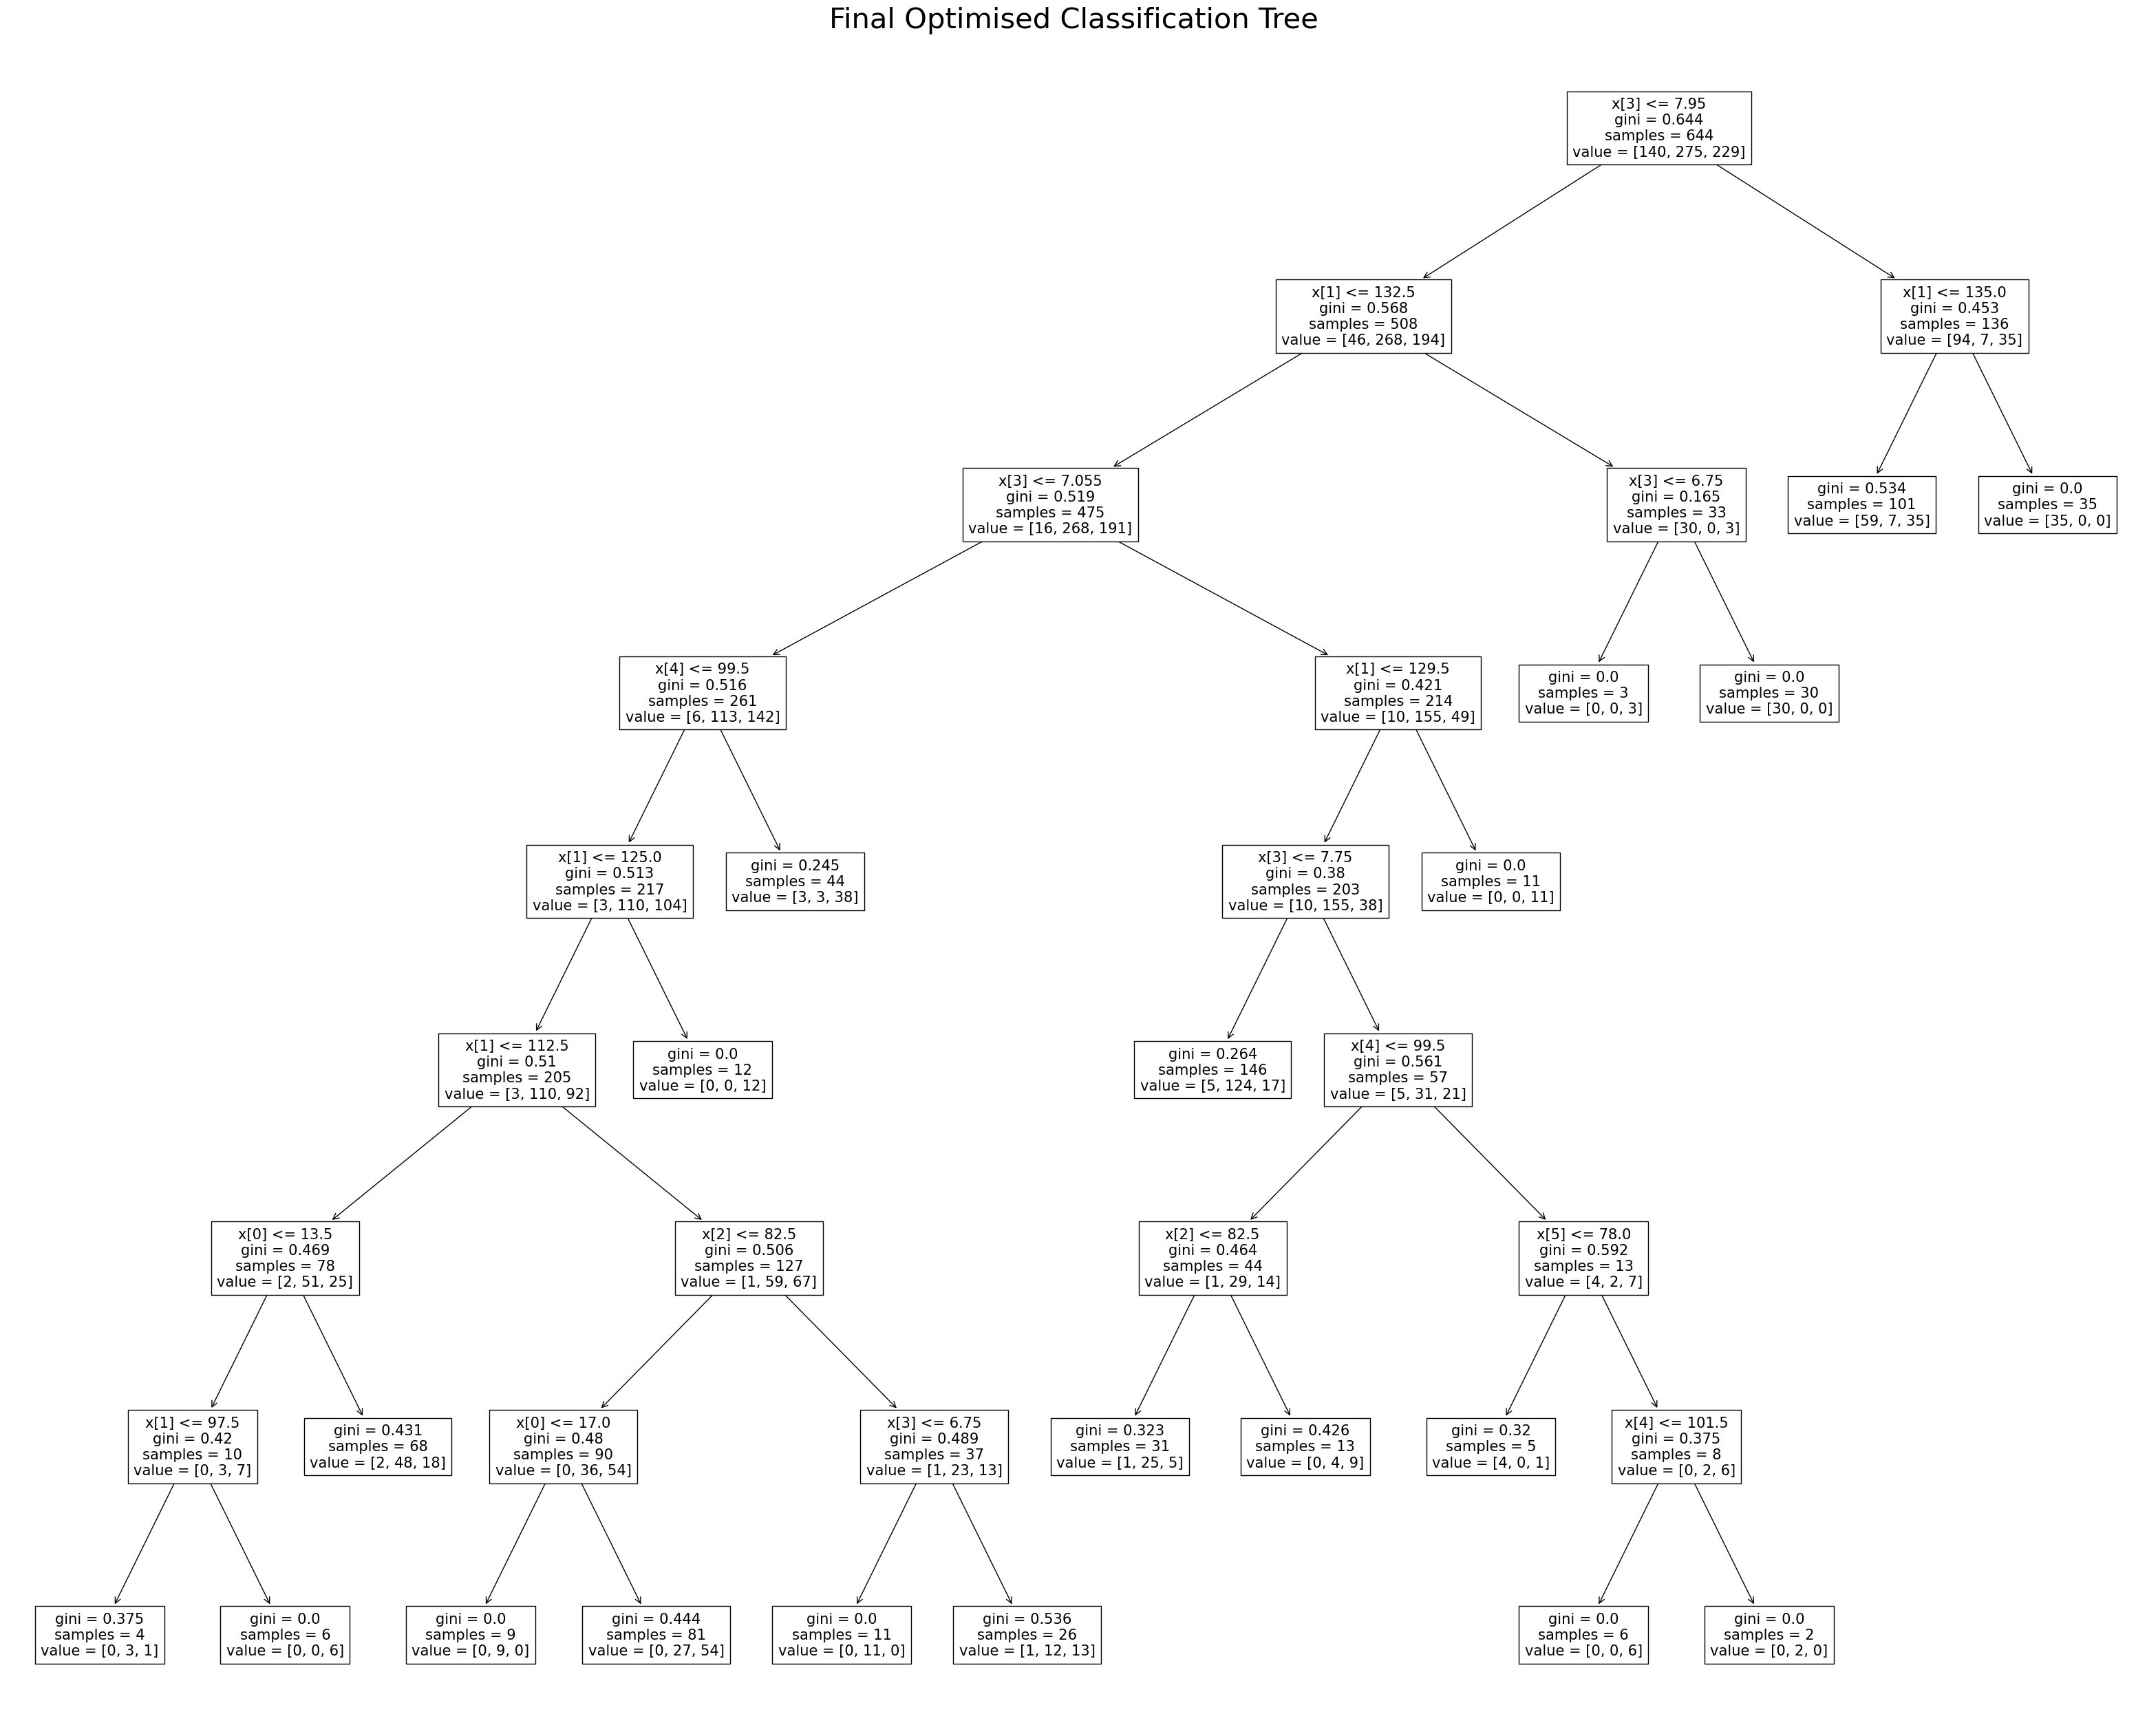

In [9]:
#Task 3 c)
# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = 20, criterion='gini')

dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

plt.figure(figsize=(40,32))
tree.plot_tree(dt_classifier.fit(X_train, y_train))
plt.title("Final Optimised Classification Tree", fontsize = 30)

print('Model accuracy score with criterion gini index: {0:0.2f}'. format(accuracy_score(y_test, y_pred)))
print('Number of tree nodes: ', dt_classifier.tree_.node_count)

In [10]:
#Task 3 d)
# Train a Decision Tree Classifier on the preprocessed data
from sklearn.tree import DecisionTreeClassifier

X = clean_riskdata.drop('RiskLevel', axis=1)  # Features
y = clean_riskdata['RiskLevel']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the data
dt_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = dt_classifier.feature_importances_

# Create a dataframe to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", importance_df)

Feature Importance:
        Feature  Importance
3           BS    0.346803
1   SystolicBP    0.231477
0          Age    0.177647
4     BodyTemp    0.081983
5    HeartRate    0.081964
2  DiastolicBP    0.080125


Confusion Matrix:
 [[42  5  7]
 [ 3 92 28]
 [17 34 48]]


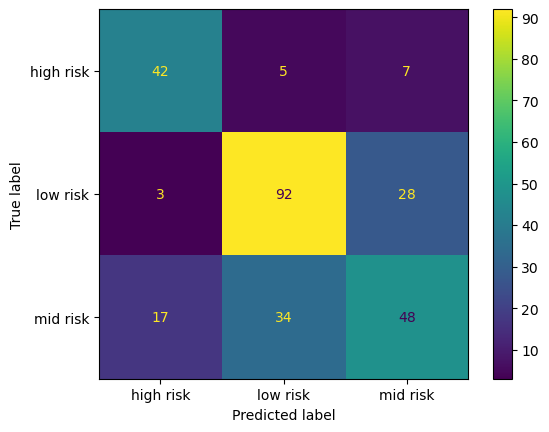

In [11]:
#Task 3 e)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

cm = confusion_matrix(y_test, y_pred, labels=dt_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt_classifier.classes_)
disp.plot()




In [12]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

   high risk       0.68      0.78      0.72        54
    low risk       0.70      0.75      0.72       123
    mid risk       0.58      0.48      0.53        99

    accuracy                           0.66       276
   macro avg       0.65      0.67      0.66       276
weighted avg       0.65      0.66      0.65       276

